/var/folders/hf/qp24zws55cg92_0z1h6971zr0000gn/T/ipykernel_5872/60595091.py:7: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(subset)
/var/folders/hf/qp24zws55cg92_0z1h6971zr0000gn/T/ipykernel_5872/60595091.py:7: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(subset)


Text(0, 0.5, 'Row #')

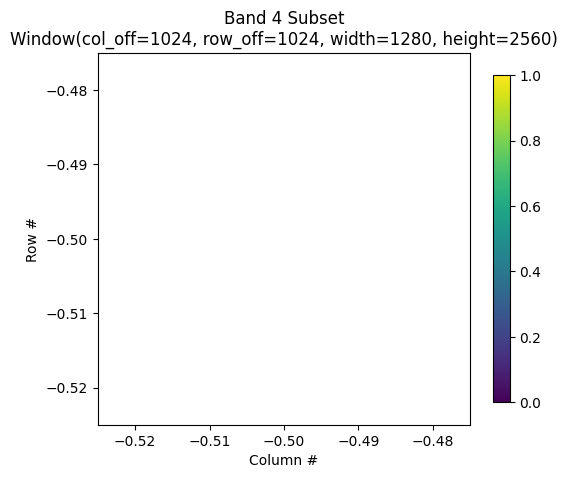

In [30]:
window = rasterio.windows.Window(1024, 1024, 1280, 2560)

with rasterio.open(fp) as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1001, 'height': 1001, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]'), 'transform': Affine(10.0, 0.0, 590520.0,
       0.0, -10.0, 5790630.0), 'blockxsize': 1001, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
array type:  <class 'numpy.ndarray'>
[[ 774  804  799 ... 1020 1043 1125]
 [ 806  797  789 ...  984 1022 1070]
 [ 804  807  791 ...  

Text(0, 0.5, 'Row #')

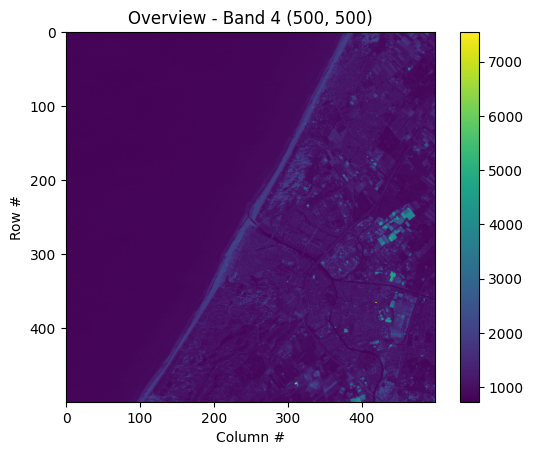

In [29]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Specify the path for Landsat TIF on AWS
fp = 'sample.tif'

# See the profile
with rasterio.open(fp) as src:
    print(src.profile)

    # NOTE this is using a 'decimated read' (http://rasterio.readthedocs.io/en/latest/topics/resampling.html)
    thumbnail = src.read(1, out_shape=(1, int(src.height // 2), int(src.width // 2)))

print('array type: ',type(thumbnail))
print(thumbnail)

plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [13]:
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1 ** 2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5 ** 2)
Z = 10.0 * (Z2 - Z1)
Z

array([[0.02122529, 0.02293761, 0.0247696 , ..., 0.00180847, 0.00163782,
        0.00148217],
       [0.02243408, 0.02424392, 0.02618023, ..., 0.00191146, 0.00173109,
        0.00156658],
       [0.02369399, 0.02560546, 0.02765053, ..., 0.00201881, 0.00182831,
        0.00165456],
       ...,
       [0.00336547, 0.00363697, 0.00392745, ..., 0.00028675, 0.00025969,
        0.00023501],
       [0.00311622, 0.00336762, 0.00363659, ..., 0.00026551, 0.00024046,
        0.00021761],
       [0.00288328, 0.00311589, 0.00336475, ..., 0.00024567, 0.00022248,
        0.00020134]], shape=(180, 240))

In [11]:
dataset.indexes
band1 = dataset.read(1)
band1
band1[dataset.height // 2, dataset.width // 2]

np.uint16(1614)

In [9]:
dataset = rasterio.open('sample.tif')
dataset.name
dataset.mode
dataset.width
dataset.height
dataset.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]')

In [12]:
import rasterio
from rasterio.transform import Affine
import numpy as np